In [12]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [30]:
x_shape = 2000
x = tf.Variable([0.01*n for n in range(x_shape)], dtype = tf.float32)

# 차수, weight 개수
n = 5

# w1 = [weight1, weight2, weight3, weight4]
# w2 = [weight1, weight2, weight3, weight4]
w1 = tf.Variable(tf.random.normal(shape=(n,), dtype=tf.float32))
w2 = tf.Variable(tf.random.normal(shape=(n,), dtype=tf.float32))

# analysis 함수 
def anal_cos(x, lamb = 1):
    return np.cos(lamb*x)

def anal_sin(x, lamb = 1):
    return np.sin(lamb*x)

def f(anal_cos, anal_sin, lamb = 1):
    return [lamb*anal_cos, lamb*anal_sin]

# Model
# n : w 개수, w : weight
def y(x, w, n = 4, b = 1):
    y = b
    
    # y = w1*(x) + w2*(x**2) + w3*(x**3) + w4*(x**4)
    for i in range(1, n+1):
        y += w[i-1]*(x**i)
    
    return y

def yprime(x, w, n = 4):
    yprime = 0

    # yprime = w1 + 2*w2*x + 3*w3*(x**2) + 4*w4*(x**3)
    for i in range(1, n + 1):
      yprime += i*w[i-1]*(x**(i-1))

    return yprime

# lambda 값, 학습률 조정
lamb = 1
learning_rate = 0.01
EPOCH = 10
batch_size = 100

# 변화 w 값, loss 저장
w1_trace = []
w2_trace = []
w1_trace.append(w1.numpy())
w2_trace.append(w2.numpy())
loss_metric = tf.keras.metrics.Mean()
loss_trace = []

# y1, y2 설정
y1 = y(x, w1, n, 1)    # cos
y2 = y(x, w2, n, 0)    # sin
y1prime = yprime(x, w1, n)
y2prime = yprime(x, w2, n)

# 학습 과정
for epoch in range(EPOCH):
    print('Epoch : ', epoch+1)
    for b in range(x_shape // batch_size):
        for x_unit, y_unit in zip(x[b*batch_size:(b+1)*batch_size], anal_cos(x[b*batch_size:(b+1)*batch_size])):
            with tf.GradientTape() as tape:
                # 예측 값
                predict = y(x_unit, w1, n)
                # Loss Function 오차
                # loss = predict - y_unit
                loss = tf.reduce_mean(tf.square(predict - y_unit)) 
                gradients = tape.gradient(loss, w1)

                # Optimizer
                w1 = tf.Variable(w1 - learning_rate*gradients, dtype=tf.float32)
                w1_trace.append(w1.numpy())
            
            loss_metric(loss)
            loss_trace.append(loss_metric.result().numpy())

        print('{} / {}'.format(b*batch_size, x_shape))
    result = 'Train Loss : {:.4f}'
    print(result.format(loss_metric.result()))
    loss_metric.reset_states()

Epoch :  1
0 / 2000
100 / 2000
200 / 2000
300 / 2000
400 / 2000
500 / 2000
600 / 2000
700 / 2000
800 / 2000
900 / 2000
1000 / 2000
1100 / 2000
1200 / 2000
1300 / 2000
1400 / 2000
1500 / 2000
1600 / 2000
1700 / 2000
1800 / 2000
1900 / 2000
Train Loss : nan
Epoch :  2
0 / 2000
100 / 2000
200 / 2000
300 / 2000
400 / 2000
500 / 2000
600 / 2000
700 / 2000
800 / 2000
900 / 2000
1000 / 2000
1100 / 2000
1200 / 2000
1300 / 2000
1400 / 2000
1500 / 2000
1600 / 2000
1700 / 2000
1800 / 2000
1900 / 2000
Train Loss : nan
Epoch :  3
0 / 2000
100 / 2000
200 / 2000
300 / 2000
400 / 2000
500 / 2000
600 / 2000
700 / 2000
800 / 2000
900 / 2000
1000 / 2000
1100 / 2000
1200 / 2000
1300 / 2000
1400 / 2000
1500 / 2000
1600 / 2000
1700 / 2000
1800 / 2000
1900 / 2000
Train Loss : nan
Epoch :  4
0 / 2000
100 / 2000
200 / 2000
300 / 2000
400 / 2000
500 / 2000
600 / 2000
700 / 2000
800 / 2000
900 / 2000
1000 / 2000
1100 / 2000
1200 / 2000
1300 / 2000
1400 / 2000
1500 / 2000
1600 / 2000
1700 / 2000
1800 / 2000
1900 

KeyboardInterrupt: 

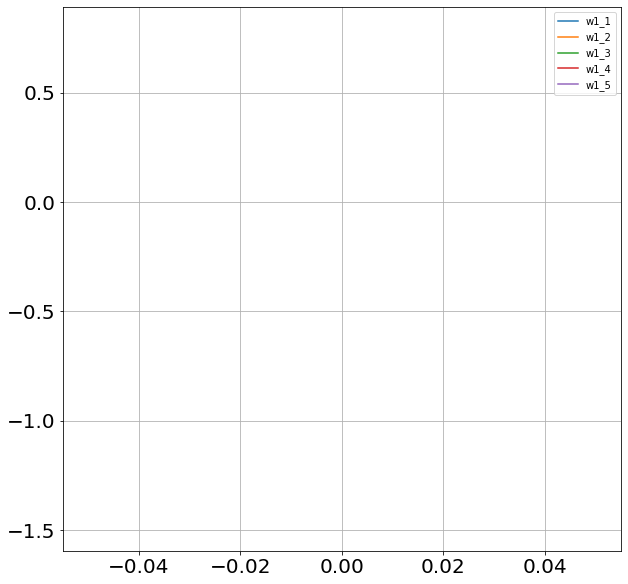

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(w1_trace, label = ['w1_1', 'w1_2', 'w1_3', 'w1_4', 'w1_5'])
# ax.plot(w2_trace, label = ['w2_1', 'w2_2', 'w2_3', 'w2_4'])
ax.tick_params(labelsize=20)
ax.legend(fontsize=10)
ax.grid()

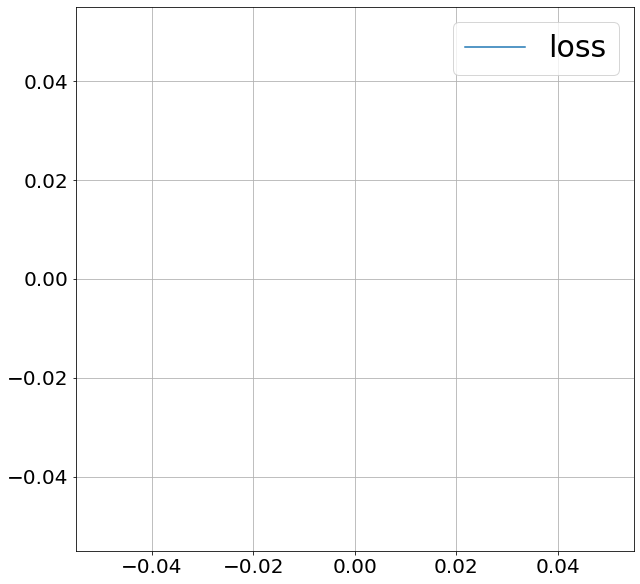

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(loss_trace, label = 'loss')
ax.tick_params(labelsize=20)
ax.legend(fontsize=30)
ax.grid()

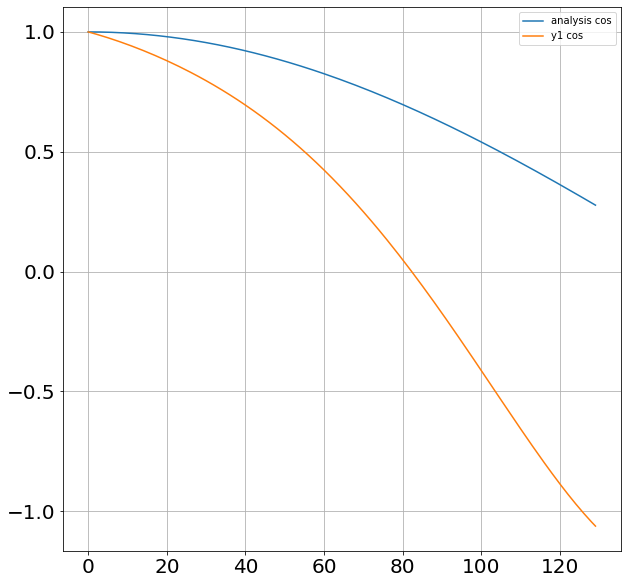

In [ ]:
x = tf.Variable([0.01*n for n in range(130)], dtype = tf.float32)
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(anal_cos(x), label = 'analysis cos')
# ax.plot(anal_sin(x), label = 'analysis sin')
ax.plot(y(x, w1, n, 1), label = 'y1 cos')
# ax.plot(y(x, w1, n) - anal_cos(x), label = 'error cos')
# ax.plot(y(x, w2, n, 0), label = 'y2 sin')
# ax.plot(y(x, w2, n) - anal_sin(x), label = 'error sin')
ax.tick_params(labelsize=20)
ax.legend(fontsize=10)
ax.grid()

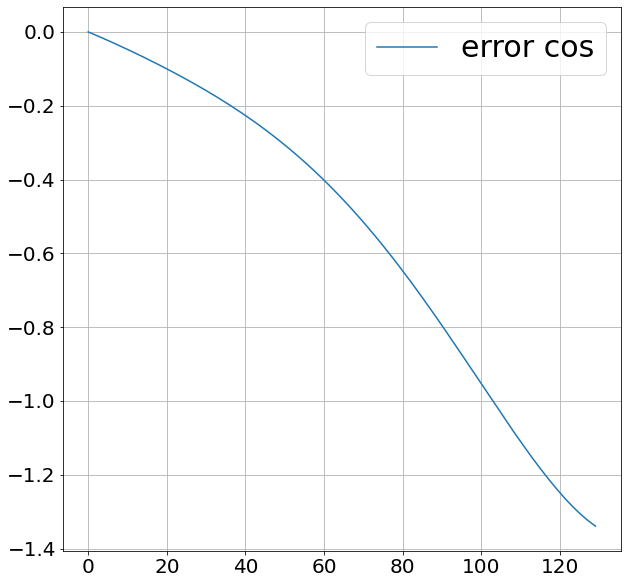

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(y(x, w1, n, 1) - anal_cos(x), label = 'error cos')
# ax.plot(y(x, w2, n, 0) - anal_sin(x), label = 'error sin')
ax.tick_params(labelsize=20)
ax.legend(fontsize=30)
ax.grid()